In [147]:
import numpy as np

data = np.load('/content/data100.npy')
target = np.load('/content/target100.npy')



In [148]:
print(data.shape)
print(target.shape)

(8005, 100, 100, 1)
(8005,)


In [149]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout,Flatten
from keras.layers import BatchNormalization, Activation
from keras.layers import GlobalAveragePooling2D
from keras.optimizers import Adam

model = Sequential()

# Block 1
model.add(Conv2D(128,(3,3),padding='same',input_shape=(100,100,1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 2
model.add(Conv2D(64,(3,3),padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Block 3
model.add(Conv2D(32,(3,3),padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# Classifier
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(50,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.0003),
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_26"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_73 (Conv2D)              │ (None, 100, 100, 128)  │         1,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_73 (Activation)      │ (None, 100, 100, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (None, 50, 50, 64)     │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_74 (Activation)      │ (None, 50, 50, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (None, 25, 25, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_75 (Conv2D)              │ (None, 25, 25, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_45          │ (None, 25, 25, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_75 (Activation)      │ (None, 25, 25, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_75 (MaxPooling2D) │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 100)            │       460,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 559,665 (2.13 MB)

 Trainable params: 559,601 (2.13 MB)

 Non-trainable params: 64 (256.00 B)

In [150]:

from sklearn.model_selection import train_test_split

train_data, test_data, train_target, test_target = train_test_split(data, target, test_size=0.2)


In [151]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator

# train_datagen = ImageDataGenerator(
#     rotation_range=15,
#     zoom_range=0.1,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     horizontal_flip=True,
# )

In [152]:
history = model.fit(train_data, train_target, batch_size=32,epochs=50,validation_data=(test_data, test_target))

Epoch 1/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 13s 46ms/step - accuracy: 0.5398 - loss: 0.7080 - val_accuracy: 0.5322 - val_loss: 0.6848
Epoch 2/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6281 - loss: 0.6494 - val_accuracy: 0.5191 - val_loss: 0.6802
Epoch 3/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.6596 - loss: 0.6166 - val_accuracy: 0.6090 - val_loss: 0.6494
Epoch 4/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 30ms/step - accuracy: 0.6913 - loss: 0.5836 - val_accuracy: 0.6034 - val_loss: 0.7266
Epoch 5/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7264 - loss: 0.5353 - val_accuracy: 0.6652 - val_loss: 0.6146
Epoch 6/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7666 - loss: 0.4936 - val_accuracy: 0.7620 - val_loss: 0.4844
Epoch 7/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 29ms/step - accuracy: 0.7768 - loss: 0.4653 - val_accuracy: 0.7364 - val_loss: 0.5411
Epoch 8/50
201/201 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.8012 - loss: 0.4370 - val_acc

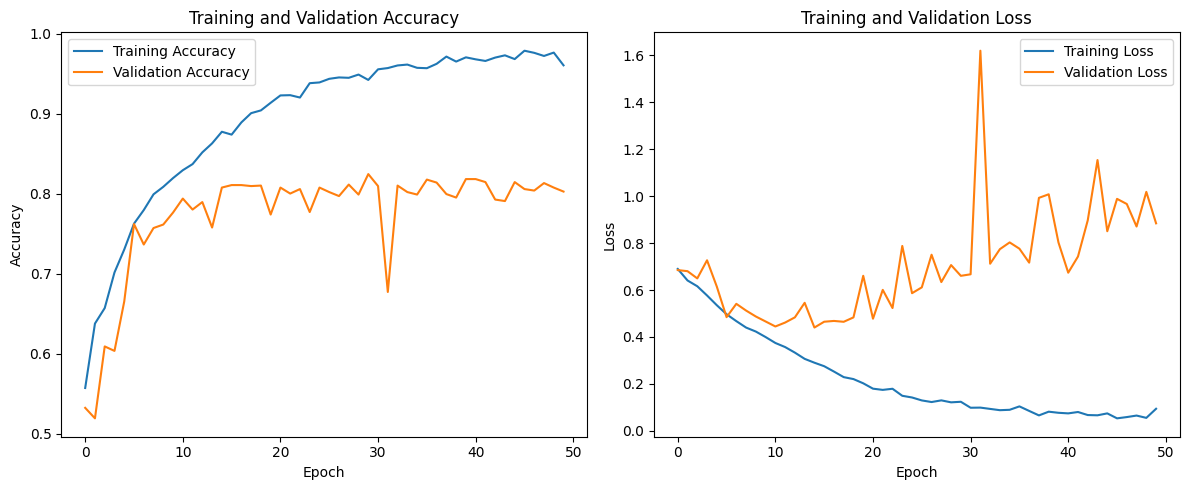

In [153]:
import matplotlib.pyplot as plt

# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [155]:
model.save('/content/drive/MyDrive/Colab Notebooks/CNN Cat and Dog Classifier/models/catdogclassifier.keras')